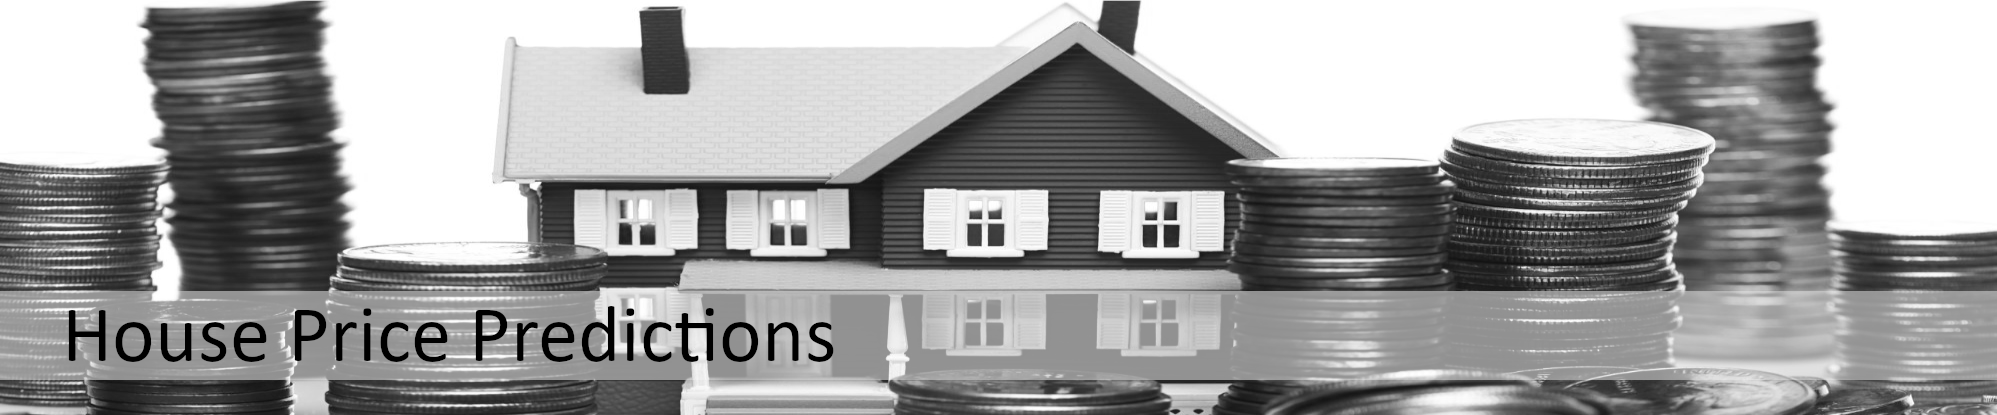

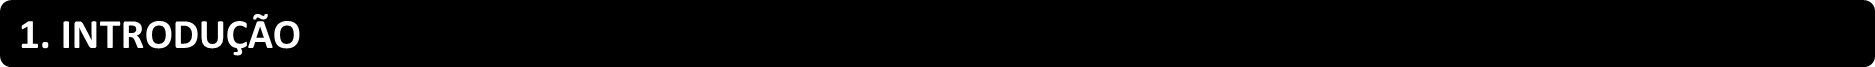

Para o presente projeto fora selecionado o *Dataset* contendo diversas características que descrevem uma casa, como número de vagas na garagem, tamanho do lote, material do telhado entre outras, cada registro contido na base de treinamento detalha não só as características do imóvel e seu processo de venda, bem como o valor de venda do mesmo.
&nbsp;

Os dados foram selecionados a partir de uma competição disponível no site do [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

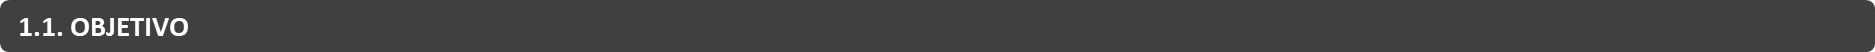

Obter o melhor resultado *(quanto menor, melhor)* para a métrica utilizada na competição, descrita abaixo:
&nbsp;

**- RMSE (Root Mean Squarred Error):** Medida que calcula a "Raiz Quadrada Média" dos erros entre todos os valores observados e as predições. Tem como característica penalizar os erros com maior grau.
Eis a sua fórmula:
&nbsp;

&nbsp;

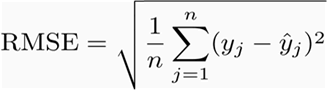
&nbsp;

&nbsp;


Para tal optei por rodar diversos algoritmos de regressão (sem utilização da biblioteca Pycaret), comparando seu resultados e selecionando o com o melhor desempenho, para posterior aplicação aos dados de validação e submissão ao [site da competição](https://www.kaggle.com).

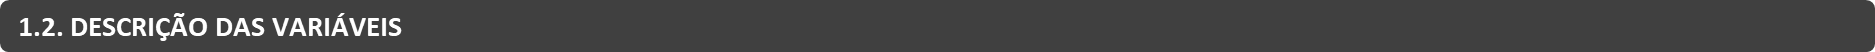

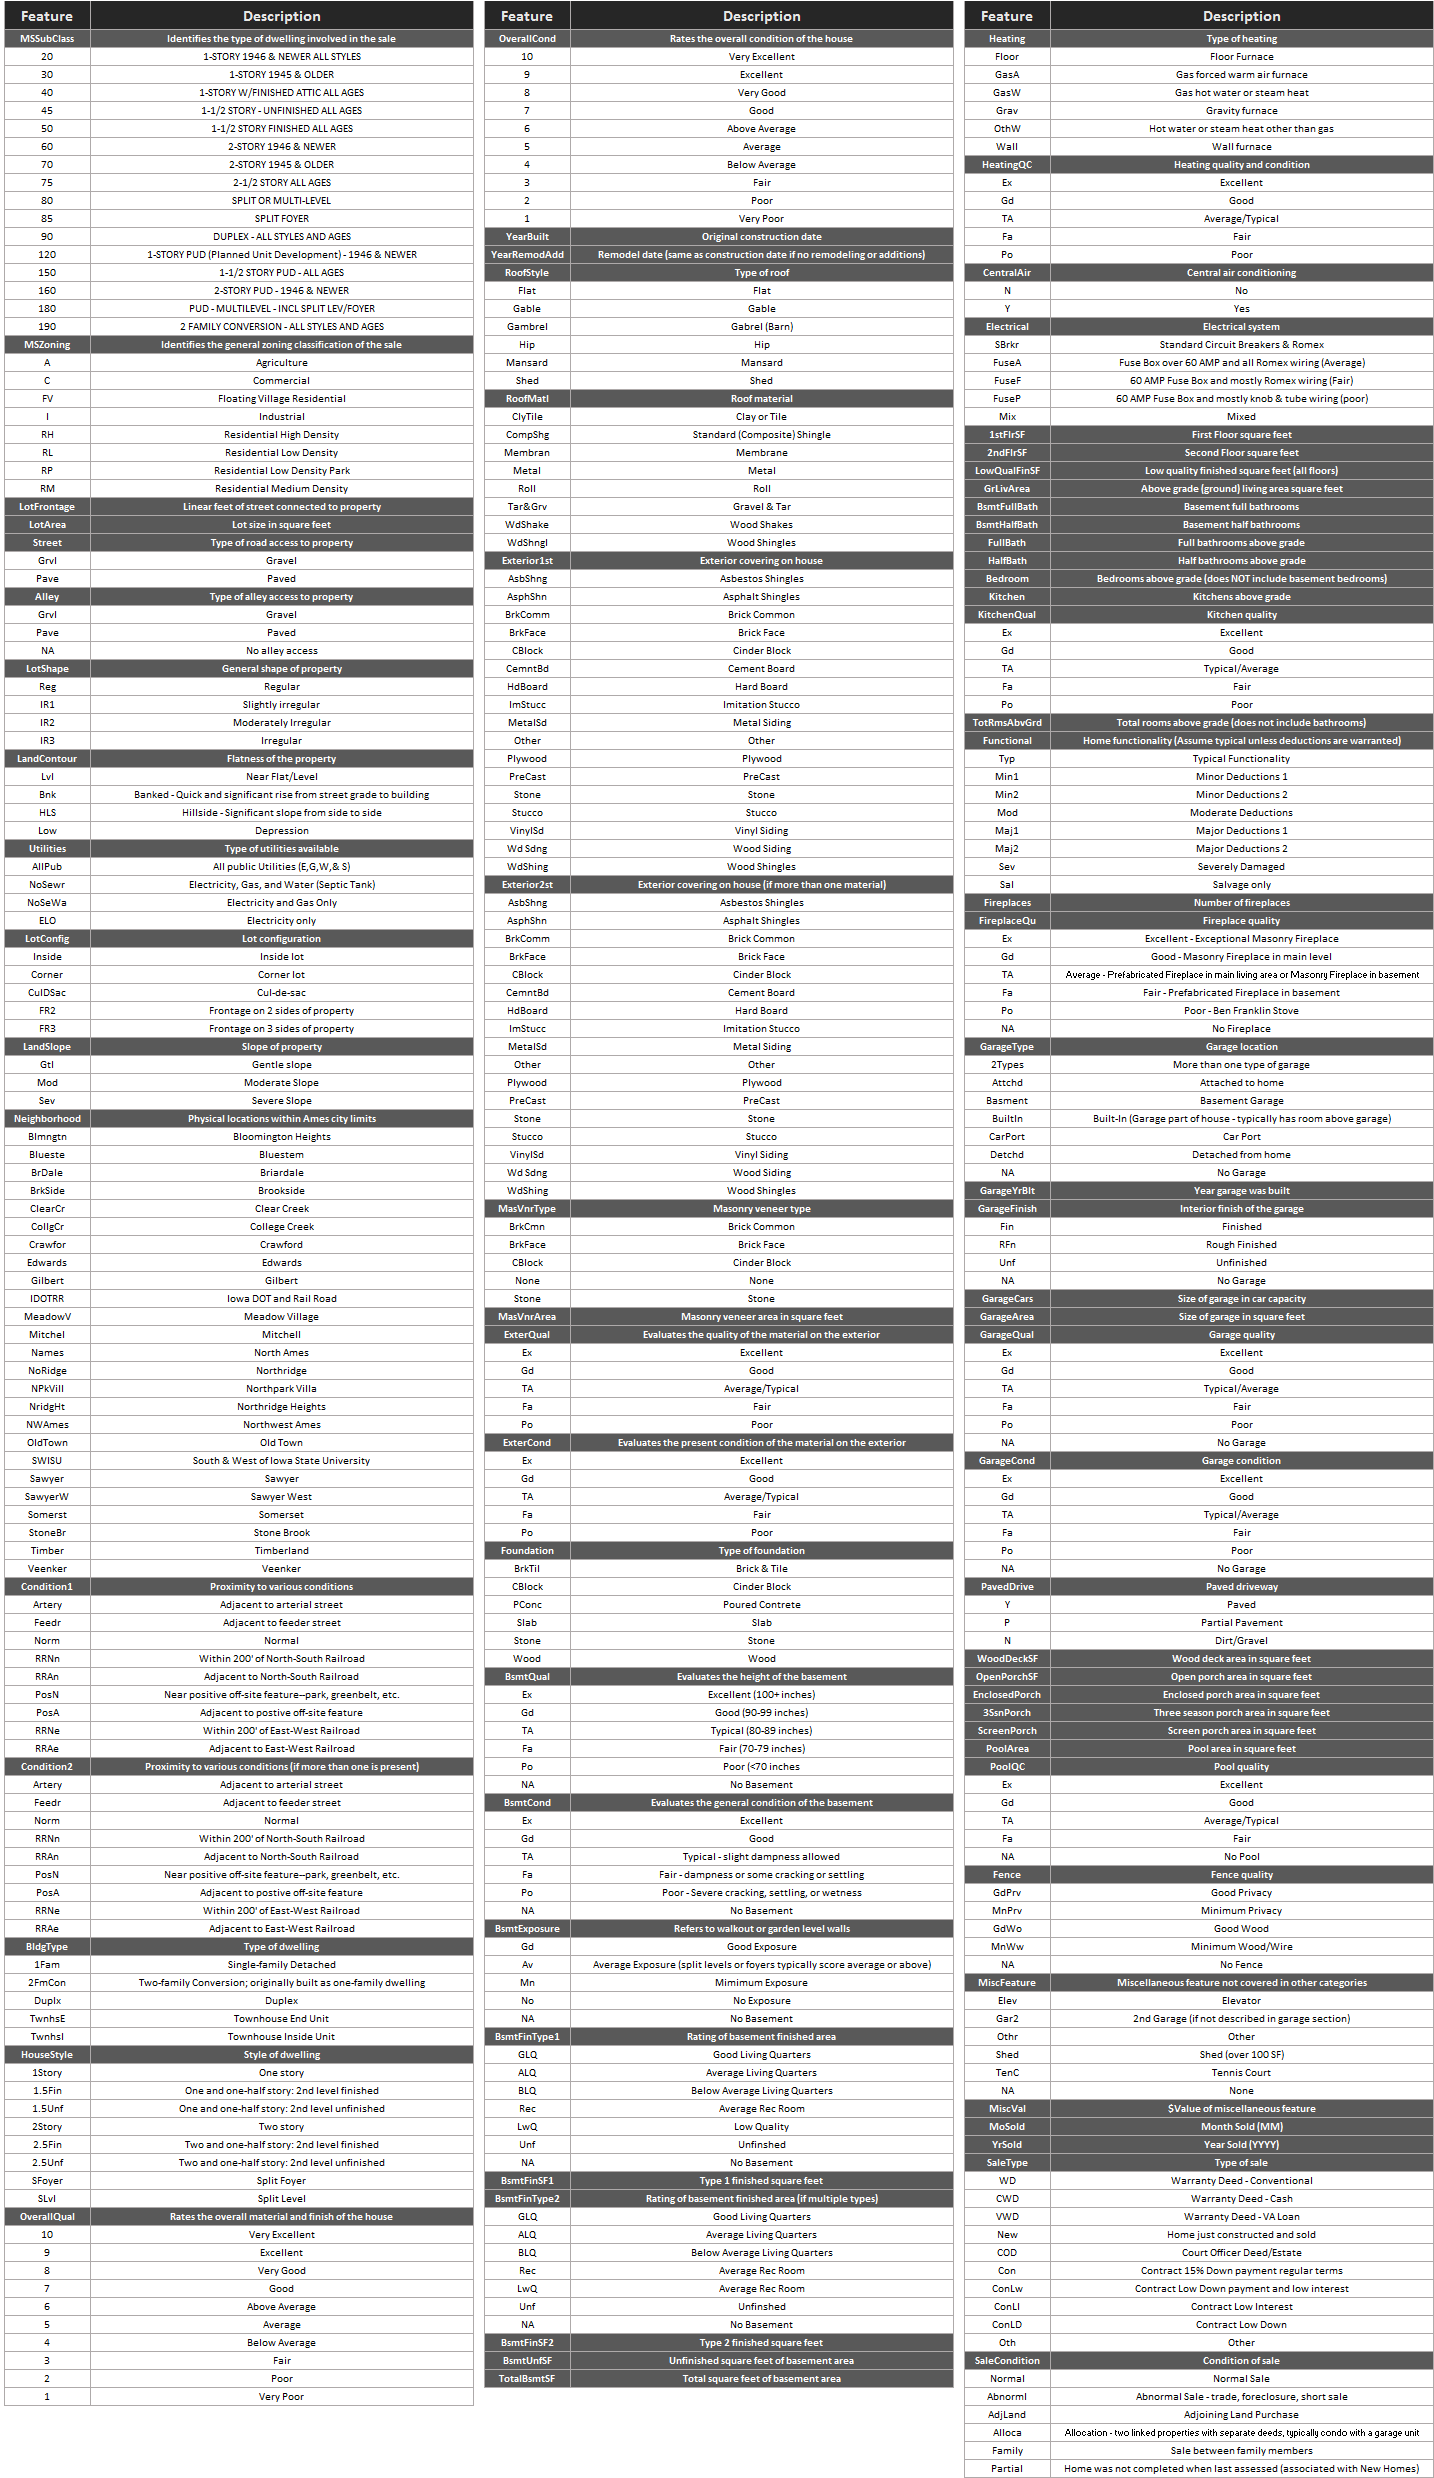

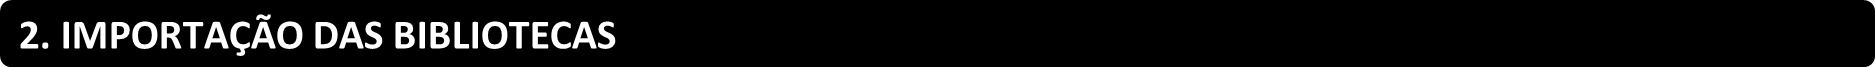

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100), pd.set_option('display.max_rows', 50)
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

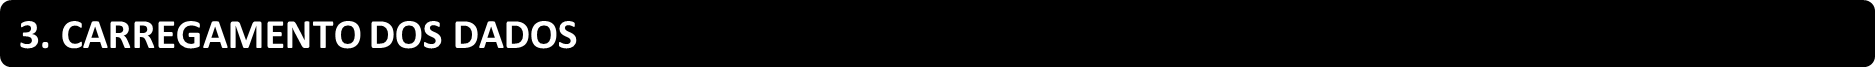

In [2]:
df_treino = pd.read_csv('Arquivos/train.csv')
df_teste = pd.read_csv('Arquivos/test.csv')
df_combinado = pd.concat([df_treino, df_teste])

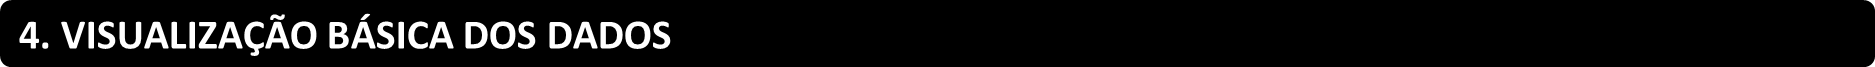

In [3]:
# Exibição das primeiras linhas do DF
df_combinado.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0


In [4]:
# Criação de função para posterior averiguação do tamanho das bases.
def colLin(df, t):
    print(f'\033[1m{t}\033[0m possui \033[1m{df.shape[0]} registros\033[0m com \033[1m{df.shape[1]} atributos cada\033[0m.')

# DF Treino x DF Teste
colLin(df_treino, 'DataFrame Treino'), colLin(df_teste, 'DataFrame Teste');

DataFrame Treino possui 1460 registros com 81 atributos cada.
 DataFrame Teste possui 1459 registros com 80 atributos cada.


In [5]:
# Informações Básicas das Colunas do DF.
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [6]:
# Exibição descritiva das variáveis numéricas do DF (38 no total).
qtdLinhas = str(df_combinado.describe().shape[1]) + ' atributos numéricos no DataFrame.'
display(qtdLinhas, df_combinado.describe())

'38 atributos numéricos no DataFrame.'

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
# Exibição descritiva das variáveis categóricas do DF (43 no total).
qtdLinhas = str(df_combinado.describe(include='O').shape[1]) + ' atributos categóricos no DataFrame.'
display(qtdLinhas, df_combinado.describe(include='O'))

'43 atributos categóricos no DataFrame.'

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2918,2895,2919,2919,2919,2838,2837,2837,2840,2839,2919,2919,2919,2918,2918,2917,1499,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,2310,2876,1025,1014,1742,1798,2538,1308,1283,2606,1904,851,2493,2874,1493,2723,2671,1492,2717,744,1723,1230,2604,2654,2641,4,329,95,2525,2402


*** 
Para essa aplicação não utilizaremos as variáveis categóricas no treinamento dos modelos.
***

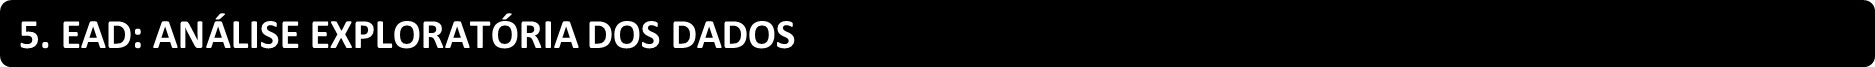

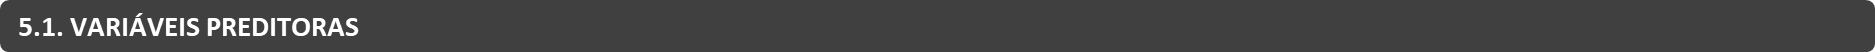

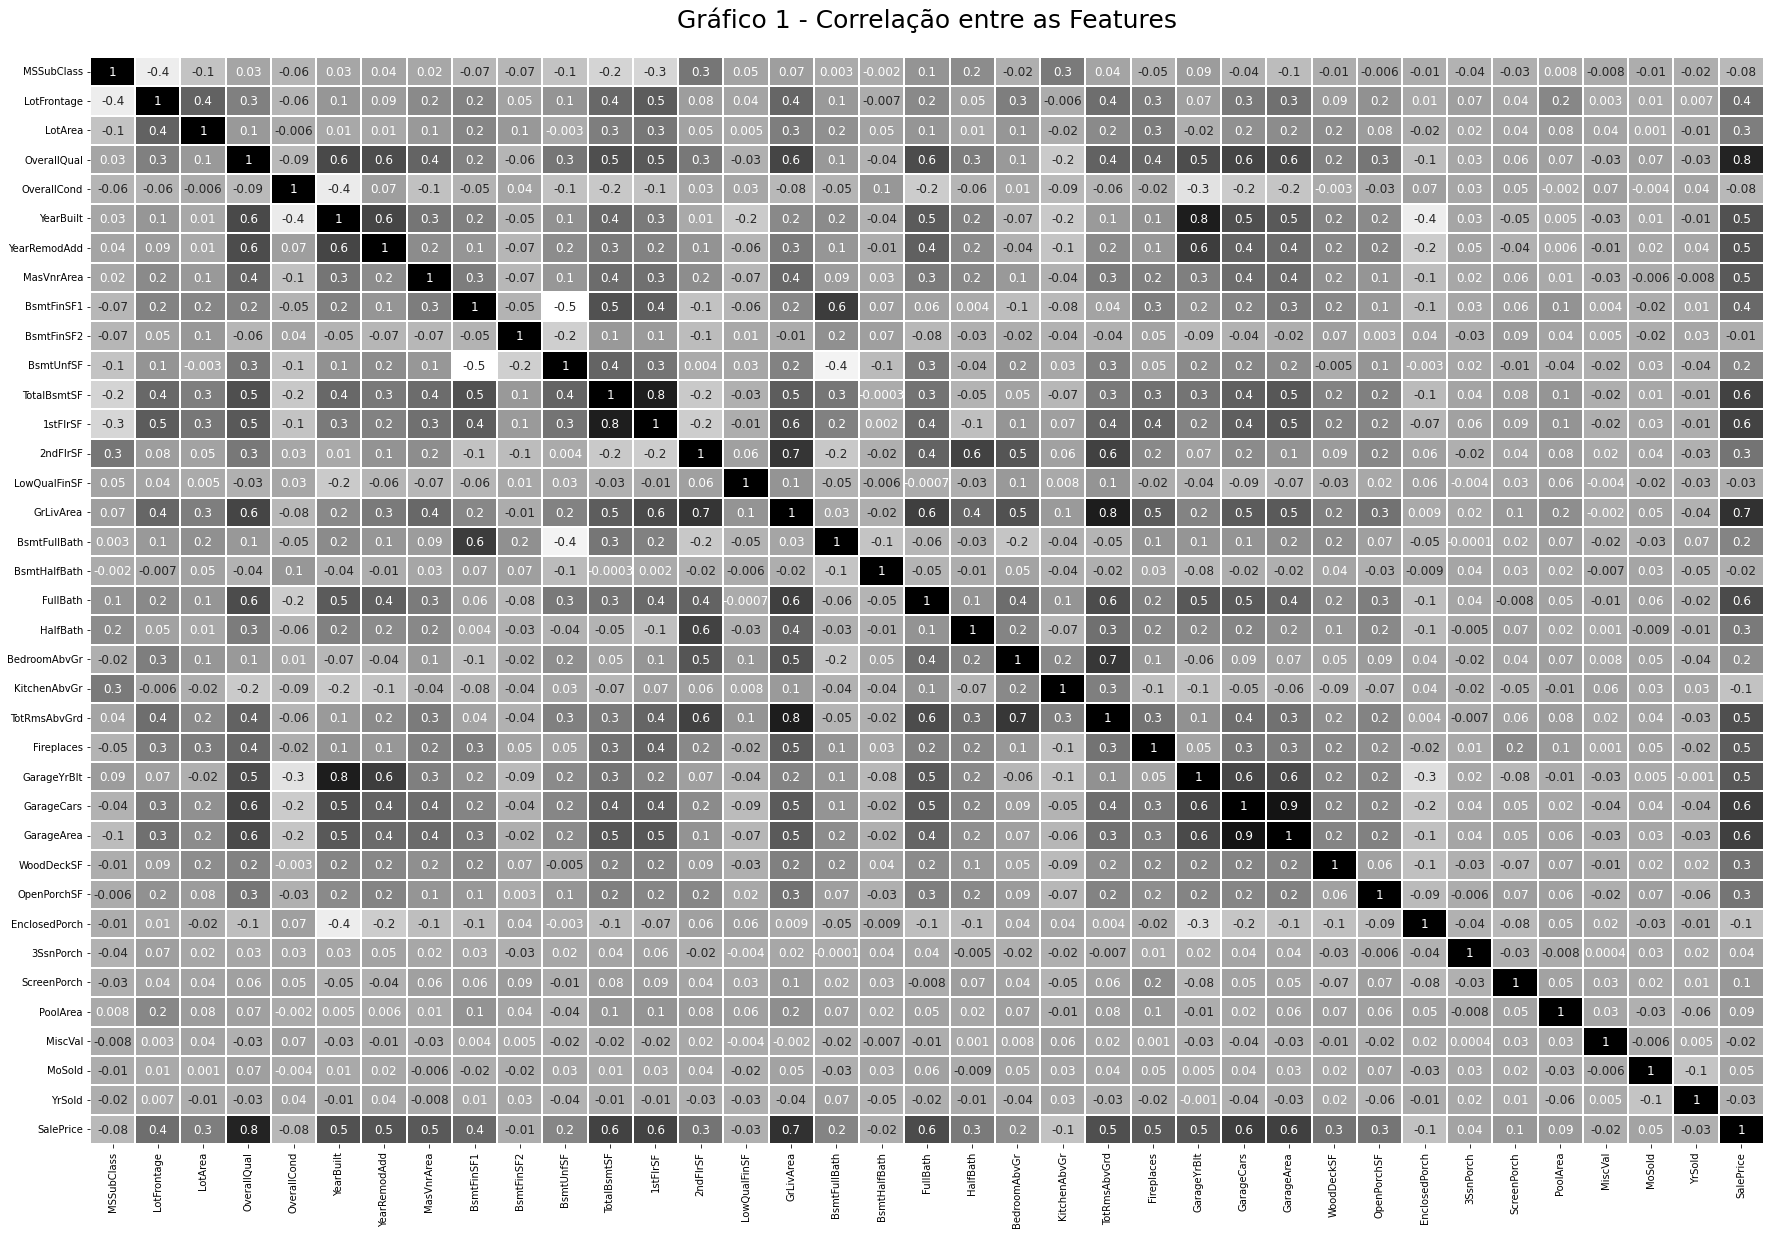

In [8]:
# Plotagem do gráfico de correlação entre as variáveis.
df_corr = df_treino.drop('Id', axis=1)
plt.figure(figsize=(30, 20))
plt.title('Gráfico 1 - Correlação entre as Features', pad=30, fontsize=25)
sns.heatmap(df_corr.corr(),
            fmt='.1g',
            annot=True,
            square=False,
            cbar=False,
            linewidths=0.25,
            cmap='gray_r',
            annot_kws={'size': 12})
plt.show()

***
**Gráfico 1 - Observações**

* Podemos observar que há algumas *features* com alta correlação com a varíavel *target*, como 'OverallQual', 'TotalBSmtSF' e 'GrLivArea' por exemplo. Veremos as TOP 10 à seguir.
* Trabalharemos com as 10 variáveis com maior relação para a construção dos nossos modelos.
***

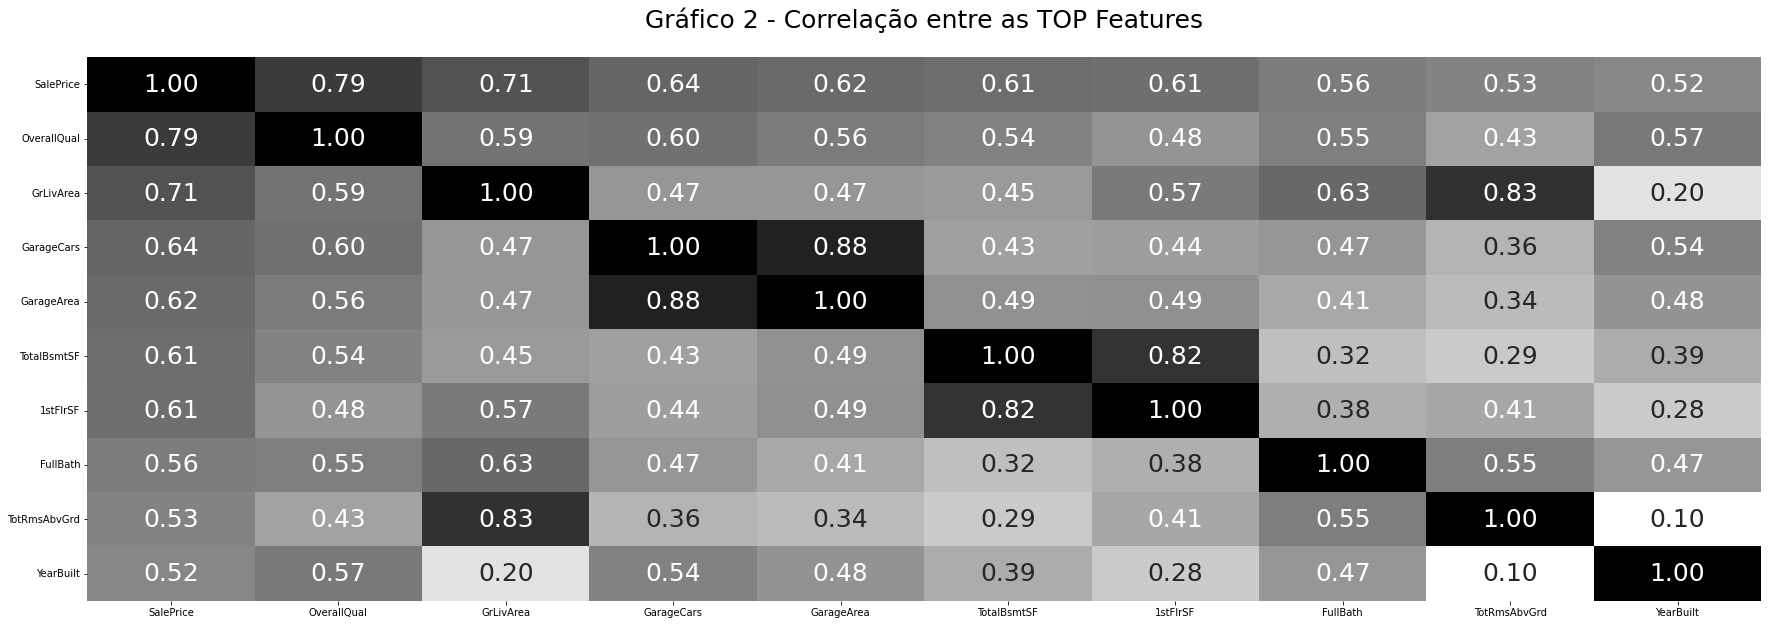

In [9]:
# Plotagem do gráfico das 10 features com maior correlação com a variável target ('SalePrice').
k = 10
plt.figure(figsize=(30, 10))
plt.title('Gráfico 2 - Correlação entre as TOP Features', pad=30, fontsize=25)
cols = df_treino.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_treino[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=False,
                 annot=True,
                 square=False,
                 fmt='.2f',
                 annot_kws={'size': 25},
                 cmap='gray_r',
                 yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

***
**Gráfico 2 - Observações**

* As *features* 'OverallQual', 'GrLivArea' e 'GarageCars' estão fortemente correlacionadas com a *feature* 'SalePrice';
* As *features* 'GarageCars' e 'GarageArea' possuem correlação semelhantes, uma vez que o tamanho da garagem geralmente corresponde à quantidade total de vagas de carros disponíveis, observa-se a correlação entre elas (0.88); Veremos essa correlação mais a fundo adiante;
* De igual modo as *features* ['TotalBsmtSF' e '1stFlrSF'] e ['GrLivArea' e 'TotRmsAbvGrd'] possuem uma alta correlação entre si.
***

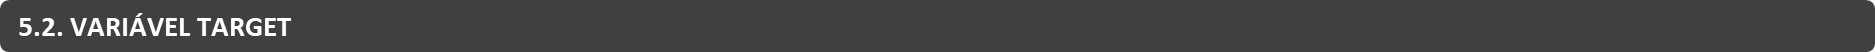

In [10]:
# Descrição da varíavel target.
df_treino.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

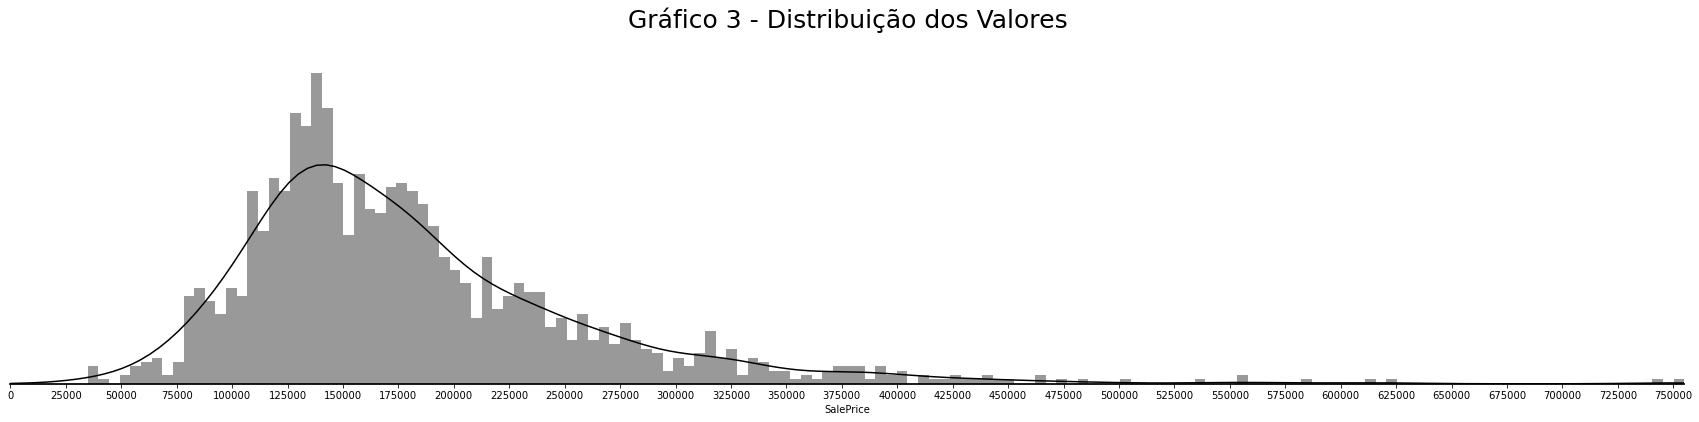

In [11]:
# Plotagem do histograma da variável target.
fig, ax = plt.subplots(figsize=(30, 6))
sns.distplot(df_treino.SalePrice, color="black", bins=150)
plt.title('Gráfico 3 - Distribuição dos Valores', pad=30, fontsize=25)

ax.set_xlim(df_treino.SalePrice.min(),df_treino.SalePrice.max())
ax.set_xticks(range(0, df_treino.SalePrice.max(), 25000))
ax.set_ylabel('')
ax.tick_params(axis='y', labelleft=False, left=None)

for axis in ['top', 'right', 'left']:
    ax.spines[axis].set_color(None)
ax.spines['bottom'].set_linewidth(1.75)

plt.show()

In [12]:
print(f'\033[1mAssimetria Positiva: {round(df_treino.SalePrice.skew(), 3)}.')
print(f'\033[1mCurtóise Platicúrtica: {round(df_treino.SalePrice.kurt(), 3)}.')

Assimetria Positiva: 1.883.
Curtóise Platicúrtica: 6.536.


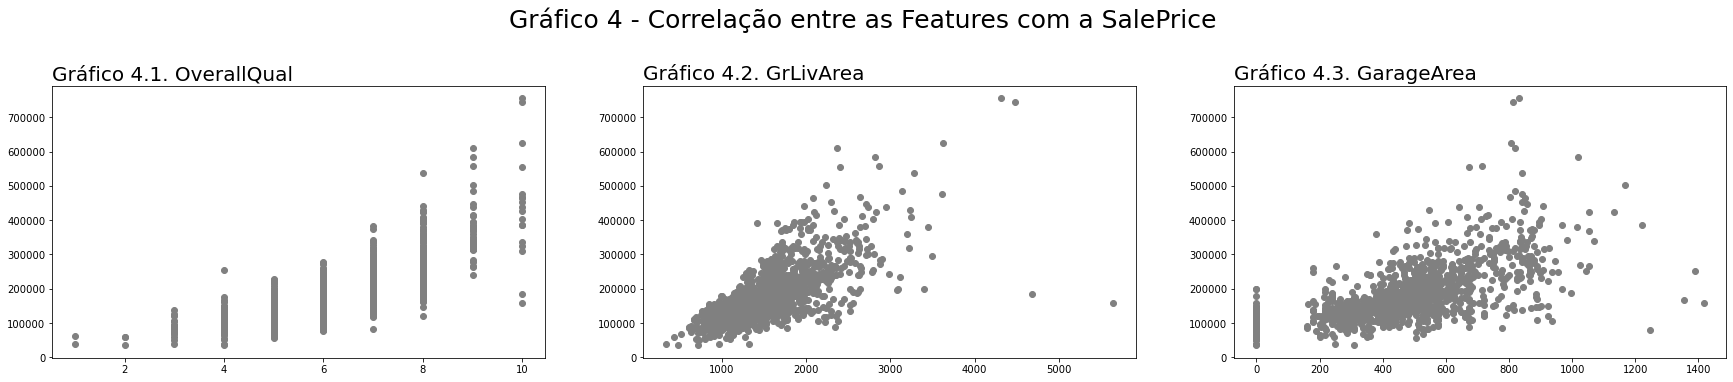

In [13]:
features = ['OverallQual', 'GrLivArea', 'GarageArea']

figura = plt.figure(figsize=(30, 5))
figura.suptitle('Gráfico 4 - Correlação entre as Features com a SalePrice', fontsize=25, y=1.1)

for i in range(3):
    figura.add_subplot(1, 3, i + 1)
    plt.scatter(x=df_treino[features[i]], y=df_treino['SalePrice'], c='gray')
    plt.title(f'Gráfico 4.{i+1}. {features[i]}', loc='left', fontsize=20)

***
**Gráfico 4. Observações**

Podemos observar alguns ***outliers***, principalmente no Gráfico 4.2.

***

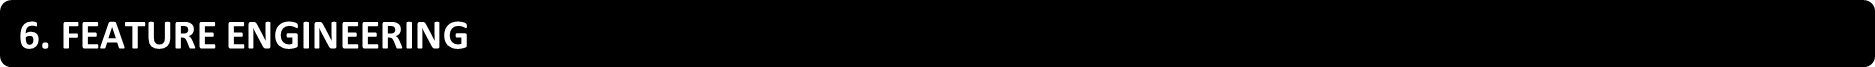

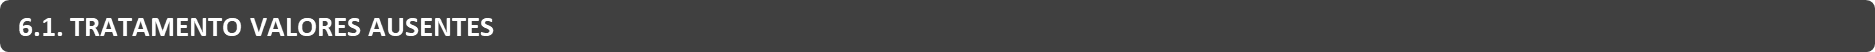

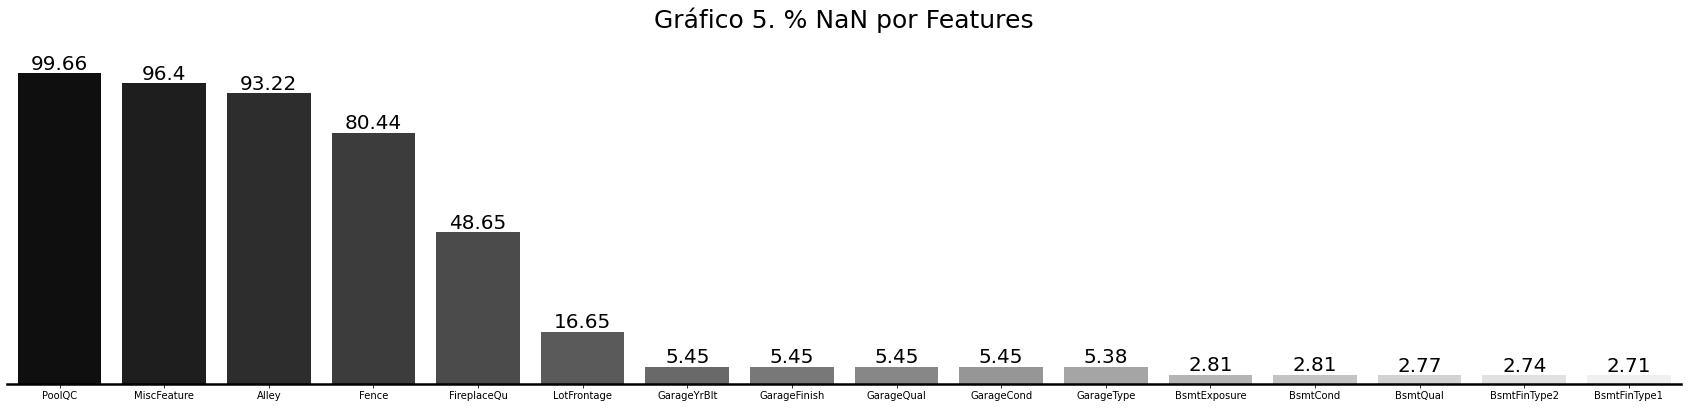

In [14]:
# Criação do DF com os Valores Nulos
df_nulos = df_combinado.drop('SalePrice', axis=1)
df_nulos = df_nulos.isnull().sum().sort_values(ascending=False)[0:34].to_frame().reset_index()
df_nulos.columns = ['Feature', 'Count']

# Plotagem do gráfico
fig, ax = plt.subplots(figsize=(30, 6))
sns.barplot(x='Feature', y='Count', data=df_nulos[0:16], palette='gray')
plt.title('Gráfico 5. % NaN por Features', fontsize=25, pad=30)

ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='y', labelleft=False, left=None)

for axis in ['top', 'right', 'left']:
    ax.spines[axis].set_color(None)
ax.spines['bottom'].set_linewidth(2.5)

for i in ax.patches:
    ax.annotate(round(i.get_height()/len(df_combinado)*100,2),       
                (i.get_x() + i.get_width() / 2, i.get_height() + 25),
                ha='center',
                va='baseline',
                xytext=(0, 1), textcoords='offset points',
                fontsize=20)

***
**Gráfico 5. Observações 1**

* **PoolQC:** Pool quality;
* **MiscFeature:** Miscellaneous feature not covered in other categories;
* **Alley:** Type of alley access do property;
* **Fence:** Fence quality; e
* **FireplaceQu:** Fireplace quality.

Possuem uma quantidade de valores ausentes demasiadamente alta, portanto iremos excluir essas *features* do *DataFrame*.

***


In [15]:
# Exclusão das colunas mencionadas acima, e da coluna ID
features_excluir = df_nulos.Feature[0:5].values
df_combinado.drop(features_excluir, axis=1, inplace=True)
df_combinado.drop('Id', axis=1, inplace=True)
shape = df_combinado.shape
print(f'Agora o DataFrame possui \033[1m{shape[0]} linhas\033[0m por \033[1m{shape[1]} colunas\033[0m.')

Agora o DataFrame possui 2919 linhas por 75 colunas.


***
**Gráfico 5. Observações 2**

Os atributos **GarageFinish**, **GarageQual**, **GarageCond** e **GarageYrBlt** possuem a mesma porcentagem de valores ausentes, bem como uma alta relação entre si. Vamos analisá-las mais profundamente.

***

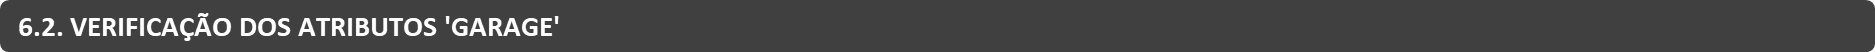

In [16]:
# Selecionando todas as colunas que possuam a palavra 'Garage'
features_garagem = [coluna for coluna in df_combinado.columns if 'garage' in coluna.lower()]

# Criação de um DataFrame apenas com as colunas selecionadas acima
df_garagem = df_combinado[features_garagem]
df_garagem['SalePrice'] = df_combinado.SalePrice
df_garagem.head(2)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,SalePrice
0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,208500.0
1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,181500.0


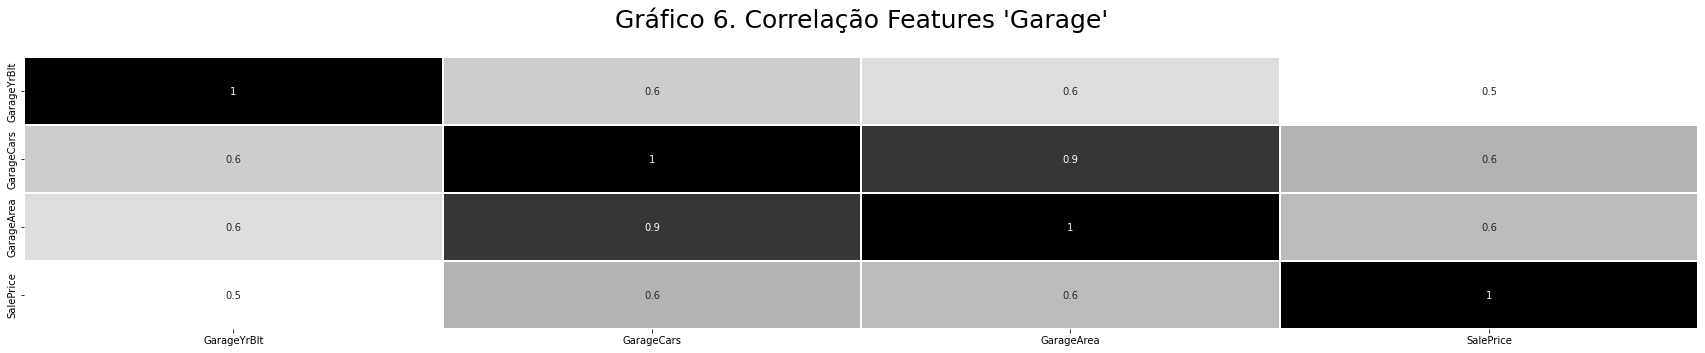

In [17]:
plt.figure(figsize=(30, 5))
plt.title("Gráfico 6. Correlação Features 'Garage'", fontsize=25, pad=30)

sns.heatmap(df_garagem.corr(), 
            fmt='.1g',
            annot=True,
            square=False,
            cbar=False,
            linewidths=0.25,
            cmap='gray_r',
            annot_kws={'size': 10})
plt.show()

***
**Gráfico 6. Observações**

As *features* **GarageArea** e **GarageCars** possuem uma alta correlação, uma vez que é justificável que quanto maior a área da garagem, maior será a quantidade de vagas para carros. Iremos optar apenas por uma delas, no caso será a **GarageCars**.

***

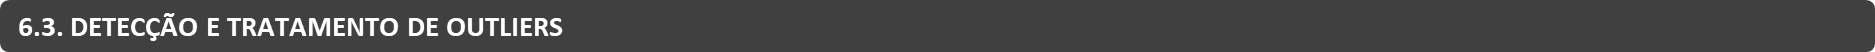

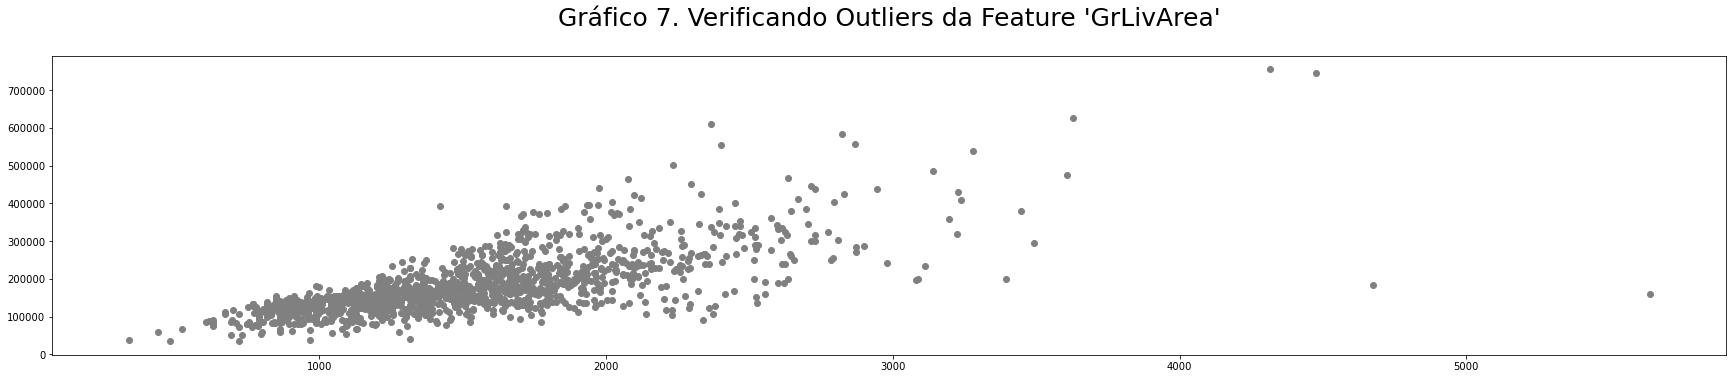

In [18]:
# Plotagem Gráfico Outliers 'GrLivArea'
plt.figure(figsize=(30, 5.5))
plt.scatter(df_treino.GrLivArea, df_treino.SalePrice, c='gray')
plt.title("Gráfico 7. Verificando Outliers da Feature 'GrLivArea'", fontsize=25, pad=30)
plt.show()

In [19]:
# Exibição das linhas identificadas com Outliers
outliers_grlivarea = df_treino[(df_treino.GrLivArea > 4000) & (df_treino.SalePrice < 300000)]
outliers_grlivarea

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [20]:
# Exclusão das linhas com Outliers identificados
df_combinado = df_combinado.reset_index()
df_combinado.drop([523, 1298], inplace=True)

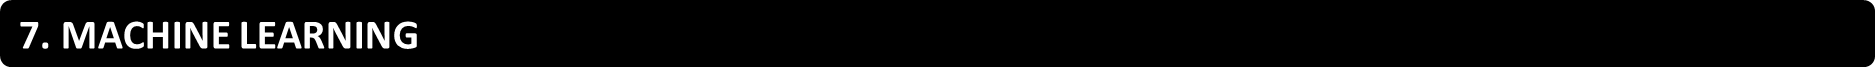

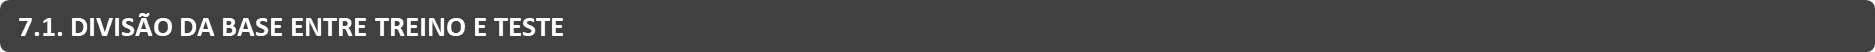

In [21]:
# Separação dos DFs Treino e de Validação
df_treino = df_combinado[df_combinado.SalePrice.notnull()]
df_valida = df_combinado[df_combinado.SalePrice.isnull()]

In [22]:
# Divisão do DF nas 'variáveis' preditoras e target
features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
X = df_treino[features]
y = df_treino.SalePrice

In [23]:
# Divisão das 'variáveis' entre treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
colLin(X_treino, 'X_treino'), colLin(X_teste, 'X_teste');

X_treino possui 1020 registros com 8 atributos cada.
X_teste possui 438 registros com 8 atributos cada.


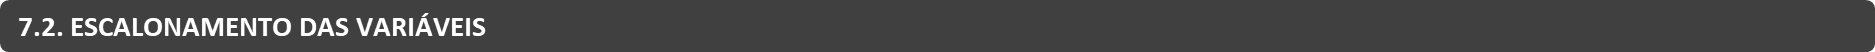

In [25]:
# Criação das variáveis escalonadas
scalerX = StandardScaler()
X_treino_scaled = scalerX.fit_transform(X_treino)
X_teste_scaled = scalerX.fit_transform(X_teste)

scalerY = StandardScaler()
y_treino_scaled = scalerY.fit_transform(y_treino.to_frame())
y_teste_scaled = scalerY.fit_transform(y_teste.to_frame())

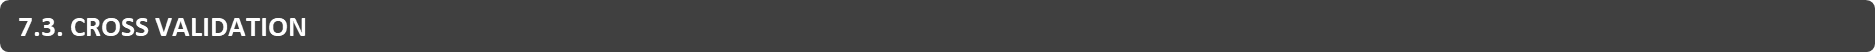

In [26]:
# Preparação
scalerX = StandardScaler()
X_scaled = scalerX.fit_transform(X)
scalerY = StandardScaler()
y_scaled = scalerY.fit_transform(y.to_frame())

regressores = []
regressores.append(('Random Forest', RandomForestRegressor(n_estimators=500, random_state=0, n_jobs=-1)))
regressores.append(('SVM', SVR(kernel='rbf')))
regressores.append(('Redes Neurais', MLPRegressor(max_iter=1000, hidden_layer_sizes=(6, 6))))
regressores.append(('Gradient Boosting', GradientBoostingRegressor(learning_rate=0.06, n_estimators=100, max_depth=3)))
regressores.append(('Ada Boost', AdaBoostRegressor(n_estimators=500, random_state=0)))
regressores.append(('XGBoost', XGBRegressor(booster='dart', n_estimators=300, max_depth=3, learning_rate=0.01, random_state=0, n_jobs=-1)))
resultados = []

for modelo, reg in regressores:
    print(f'Treinando -> {modelo} ...')
    for i in tqdm(range(30)):
        kfold = KFold(n_splits=10, shuffle=True, random_state=i)                    
        scores = cross_val_score(reg, X_scaled, y_scaled, cv=kfold)
        temp = [modelo, scores.mean()]
        resultados.append(temp)

Treinando -> Random Forest ...


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:02<00:00,  4.10s/it]


Treinando -> SVM ...


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:17<00:00,  1.69it/s]


Treinando -> Redes Neurais ...


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:39<00:00,  3.32s/it]


Treinando -> Gradient Boosting ...


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:31<00:00,  1.03s/it]


Treinando -> Ada Boost ...


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:32<00:00,  3.09s/it]


Treinando -> XGBoost ...


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [14:38<00:00, 29.28s/it]


In [27]:
# Transformação da lista de resultados em um DataFrame
colunas = ['Random Forest', 'SVM', 'Redes Neurais', 'Gradient Boosting', 'Ada Boost', 'XG Boost']
df_resultados = pd.DataFrame()

for coluna in colunas:
    df_resultados[coluna] = 0    
    
for i in range(30):
    df_resultados.loc[i] = [resultados[i][1], resultados[i + 30][1], 
                            resultados[i + 60][1], resultados[i + 90][1],
                            resultados[i + 120][1],resultados[i + 150][1]]

display(df_resultados.head(2), df_resultados.describe())

,Random Forest,SVM,Redes Neurais,Gradient Boosting,Ada Boost,XG Boost
0,0.867794,0.827404,0.857281,0.872586,0.813953,0.851723
1,0.865953,0.831303,0.857304,0.873803,0.807573,0.852866


,Random Forest,SVM,Redes Neurais,Gradient Boosting,Ada Boost,XG Boost
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.863477,0.828983,0.853892,0.869214,0.804538,0.850006
std,0.004631,0.002861,0.005222,0.004168,0.007354,0.004081
min,0.853174,0.822885,0.839676,0.855644,0.785745,0.839309
25%,0.860697,0.827206,0.850200,0.867413,0.801421,0.848794
50%,0.863286,0.829592,0.855044,0.870150,0.804860,0.850647
75%,0.866415,0.831068,0.857298,0.872304,0.808908,0.852833
max,0.870761,0.833433,0.861633,0.874380,0.818047,0.856750


In [28]:
# Exportação do DF criado
df_resultados.to_csv('Arquivos/resultadosWithKFold.csv')

In [29]:
# Criação do Dicionario com os Algoritmos e a  Média do Desempenho
dictResults = {coluna: df_resultados[coluna].mean() for coluna in df_resultados.columns}

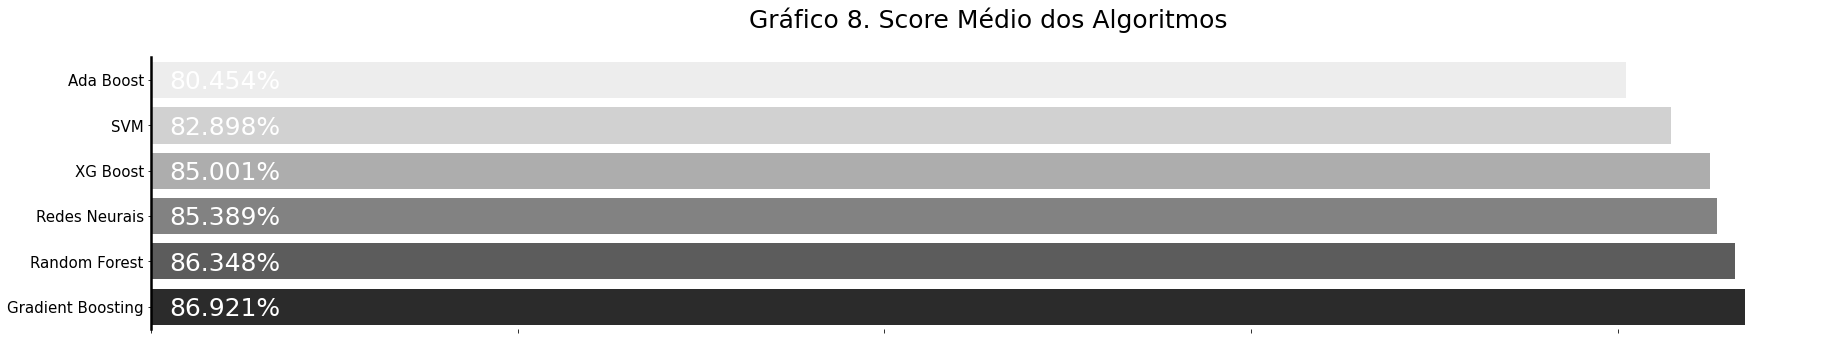

In [30]:
# Plotagem do Gráfico de Desempenho dos Algoritmos
x = [i for i in sorted(dictResults, key = dictResults.get)]
y = [dictResults[i] for i in sorted(dictResults, key = dictResults.get)]

fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(y, x, palette='Greys')
ax.tick_params(axis='x', labelbottom=False), ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel(''), ax.set_ylabel(''), ax.set_title('Gráfico 8. Score Médio dos Algoritmos', fontsize=25, pad=30)
ax.spines['left'].set_linewidth(2.5)

for axis in ['top', 'right', 'bottom']:    ax.spines[axis].set_color(None)

for i, v in enumerate(y):
    plt.text(0.01, i+0.2 , s=(str(round(v*100,3)) + '%'), color='white', fontsize=25)

***
Após aplicação da técnica de Validação Cruzada, podemos observar que o algoritmo que obteve o melhor desempenho foi o Gradient Boosting.

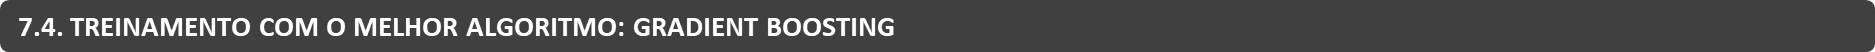

In [31]:
features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']

X = df_treino[features]
y = df_treino.SalePrice

scalerX = StandardScaler()
X_scaled = scalerX.fit_transform(X)
scalerY = StandardScaler()
y_scaled = scalerY.fit_transform(y.to_frame())

best_model = GradientBoostingRegressor(learning_rate=0.06, n_estimators=100, max_depth=3)
best_model.fit(X_scaled, y_scaled)

GradientBoostingRegressor(learning_rate=0.06)

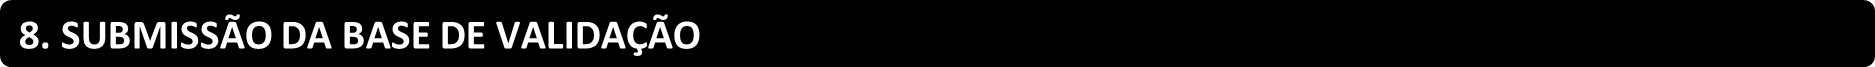

In [32]:
# Substituição dos Valores NaN na Base de Validação
df_teste.GarageCars.fillna(df_teste.GarageCars.mean(), inplace=True)
df_teste.TotalBsmtSF.fillna(df_teste.TotalBsmtSF.mean(), inplace=True)

X = df_teste[features]
X_scaled = scalerX.fit_transform(X)

previsao = best_model.predict(X_scaled)
previsao_final = scalerY.inverse_transform(previsao.reshape(-1, 1))

In [33]:
price = pd.DataFrame(previsao_final)
price.rename(columns={0:'SalePrice'}, inplace=True)
df_sub = pd.DataFrame({'Id': df_teste.Id, 'SalePrice': np.round(price.SalePrice, 0)})
df_sub.to_csv('Arquivos/GradientBoosting.csv', index=False)

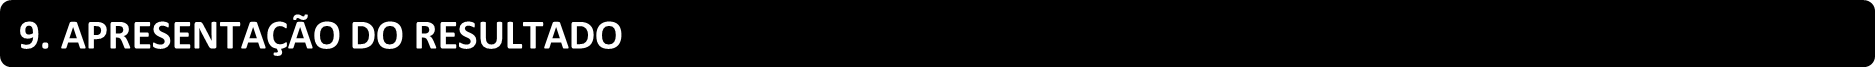

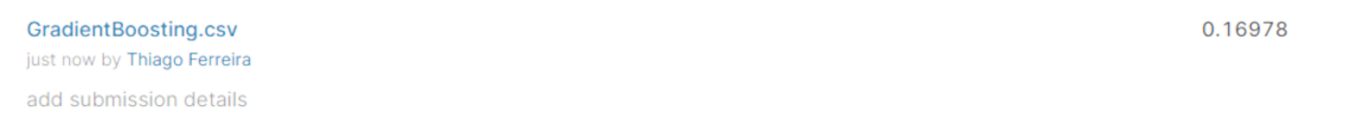

***
Após submissão ao Kaggle, eis o resultado obtido. Lembrando que a métrica utilizada para avaliar o algoritmo foi o RMSE (Root Mean Squarred Error).
***

|                 **Github**                	|                 **Linkedin**                 	|                  **Kaggle**                  	|               **Email**              	|
|:-----------------------------------------:	|:--------------------------------------------:	|:--------------------------------------------:	|:------------------------------------:	|
| [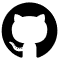](https://www.github.com/ThiagoFerreiraWD) 	| [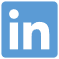](https://www.linkedin.com/in/tferreirasilva) 	| [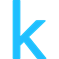](https://www.kaggle.com/thiagoferreirasilva) 	| [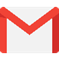](mailto:thiago.ferreirawd@gmail.com) 	|  